**Rio de Janeiro, 28 de Maio de 2016**

Aluno: **Carlos Mattoso **_[ **1210553** ]_

Disciplina: **INF1608 - Análise Numérica**

# Lista 5

## Método de _Sheppard_

In [11]:
import numpy as np

def evalSheppard(x,y,xp,yp,zp,k):
    n  = len(xp)
    s  = np.zeros(n)
    wt = 0.0
    for i in range(n):
        if (x == xp[i] and y == yp[i]):
            return zp[i]
        s[i] = 1.0/math.sqrt((x - xp[i])**2.0 + (y - yp[i])**2.0)**k
        wt += s[i]
    p = 0.0
    for i in range(n):
        p += zp[i]*(s[i]/wt)
    return p

## Validação

### Setup

In [12]:
import matplotlib.pyplot as plt
import math
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

# Para um dado meshgrid `x` e `y` calcula os valores de Z através do método de Sheppard
def eval_z_func(x,y,PX,PY,PZ,k):
    Z = np.zeros((len(x),len(y)))                 
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i,j]=evalSheppard(x[i,j],y[i,j],PX,PY,PZ,k)
    return Z

### Pontos dados em Sala

Exibe-se abaixo as curvas de nível obtidas através da interpolação por _Sheppard_ para $k \in \{2,3,4\}$. Pode-se ver que o resultado para $k = 2$ é idêntico ao exibido na aula prática. Além disso, os pontos usados como entrada do método concentram-se em regiões de mínimos e máximos locais, comportamento visto também no caso bidimensional. Por fim, como esperado, para valores de $k$ maiores os picos e vales ficam mais acentuados, como visto na aula teórica.

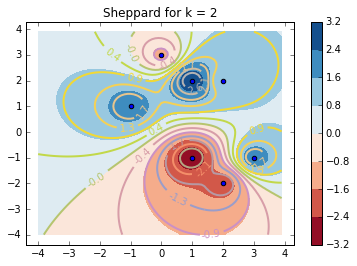

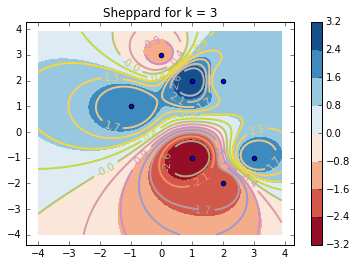

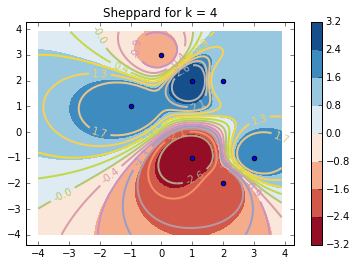

In [13]:
PX = [-1.0,0.0,1.0,2.0,3.0,2.0,1.0]
PY = [ 1.0,3.0,2.0,2.0,-1.0,-2.0,-1.0] 
PZ = [ 2.0,-1.0,3.0,1.0,2.0,-2.0,-3.0]

for k in range(2,5):
    x = arange(-4.0,4.0,0.1)
    y = arange(-4.0,4.0,0.1)
    X,Y = meshgrid(x, y) # grid of point

    Z = eval_z_func(X,Y,PX,PY,PZ,k) # evaluation of the function on the grid

    # adding the Contour lines with labels
    cset1 = plt.contourf(X,Y,Z,cmap=cm.RdBu)
    cset2 = plt.contour(X,Y,Z,arange(min(PZ),max(PZ),(max(PZ)-min(PZ))/(len(PZ)*2)),linewidths=2,cmap=cm.Set2)
    plt.scatter(PX,PY)
    plt.clabel(cset2,inline=True,fmt='%1.1f',fontsize=10)
    plt.colorbar(cset1) # adding the colobar on the right

    plt.title("Sheppard for k = %d" % k)
    plt.show()